# Entanglement in Action

Below are notes from each section of the qiskit course documentation found on this page: https://learn.qiskit.org/course/basics/entanglement-in-action

While previous lessons have introduced the term _entanglement_, they have all introduced it as a correlation of states and by result instantly knowing one system's state after measuring its counterpart. These results can happen in both the classical and quantum world,  but this page will walk through 3 key examples that show how quantum entangled systems have additional capabilities that classically correlated systems do not. This will illustrate the quantum advantage.

## Teleportation

**Background**: Quantum teleportation is a protocol where we wish to transmit quantum information. Alice & Bob share one particle each of an entangled pair in the state $|\phi^+>$. Alice has a third qubit Q that she wishes to transmit to Bob but she does not know (nor needs to know) the exact state of Q. The goal of teleportation is for Bob to hold a qubit that is in the same state of Q at the start of the protocol (including all correlations with other systems) as if Alice had physically handed Q to Bob. _We know as per the no-cloning theorem that we cannot recreate or clone a particle in the same state of Q that Bob holds using classical information._

#### Protocol

![image teleportation](./teleportation.png)

1. Alice performs a controlled-NOT operation on the pair (A, Q) where A is her entangled particle and Q is the particle she wishes to send. Then she performs a Hadamard operation on Q.

2. Aliice then measures both A and Q with respect to a standard basis measurement and transmits the classical outcomes, a and b respectively, to Bob.

3. Bob receives a and b and depending on the values of these bits, he performs the following operations: if a=1, Bob performs a bit flip (X) on qubit B and if b=1 then Bob performs a phase flip (Z) on qubiit B.

And that's it! Note here that this protcol will destroy the state of Q since it measures it. This is how this protocol does not break the no-cloning theorem. Similarly, A and B are no longer entangled since A was measured so this limits the communication channel to a 1 time use.

#### Analysis

![image teleportation-time-steps](teleportation-time-steps.png)

Lets start simple and say our qubit Q is in a general state $\alpha|0> + \beta|1>$. We can describe our system at different time points:

$|\pi_0> = |\phi^+> \otimes (\alpha|0> + \beta|1>) = \frac{\alpha|000> + \alpha|110> + \beta|001> + \beta|111>}{\sqrt{2}}$<br><br>
***
$|\pi_1> = \frac{\alpha|000> + \alpha|110> + \beta|011> + \beta|101>}{\sqrt{2}}$ <br><br>
***
$|\pi_2> = \frac{\alpha|00+> + \alpha|11+> + \beta|01-> + \beta|10->}{\sqrt{2}}$<br><br>
$|\pi_2> = \frac{\alpha|00>(\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>) + \alpha|11>(\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>) + \beta|01>(\frac{1}{\sqrt{2}}|0> - \frac{1}{\sqrt{2}}|1>) + \beta|10>(\frac{1}{\sqrt{2}}|0> - \frac{1}{\sqrt{2}}|1>)}{\sqrt{2}}$<br><br>
$|\pi_2> = \frac{\alpha|00>(|0> + |1>) + \alpha|11>(|0> + |1>) + \beta|01>(|0> - |1>) + \beta|10>(|0> - |1>)}{2}$<br><br>
$|\pi_2> = \frac{\alpha|000> + \alpha|001> + \alpha|110> + \alpha|111> + \beta|010> - \beta|011> + \beta|100> - \beta|101>}{2}$

Then we apply the measurements. Measuring ab=00 means we have the following states: $\frac{1}{2}(\alpha|000> + \beta|100>$ which we can rewrite as $(\alpha|0> + \beta|1>)|00>$ which puts Bob's particle exactly in the state of Q.

In the case of measuring ab=01, we have the following possible states overall: $\frac{1}{2}(\alpha|001> - \beta|101>)$ which we can rewrite as $(\alpha|0> - \beta|1>)|01>$ which is almost the state Q but as per protocol, after applying a Z gate, we get back the state we expect.

In the case of ab=10, we have $\frac{1}{2}(\alpha|101> + \beta|001>)$ which we can rewrite as $(\alpha|1> + \beta|0>)|01>$ which is almost the state Q but as per protocol, after applying a X gate, we get back the state we expect.

Lastly, in the case of ab=11, we have $\frac{1}{2}(\alpha|111> - \beta|011>)$ which we can rewrite as $(\alpha|1> - \beta|0>)|11>$ which is almost the state Q but as per protocol, after applying an X and Z gate, we get back the state we expect.

At the end, Bob has a particle in state Q and Alice has 2 qubit system in one of the 4 states of 00, 01, 10, or 11 with all equal probability (1/4). Note also that Alice's measurements revealed no information about Q since they all had measurement outcomes of 1/4 irrespective of $\alpha$ and $\beta$. This was due to fact that all measurements included an alpha and beta term, whos euclidean norm/sum is always 1. We can show that this still works in cases where we have a particle Q that is entangled with another particle and mathematically, it works out that those pieces of the math just "come along for the ride" as part of the math showed in the simpler version above, so it doesn't change too much.

<font color=red>Comment: </font>It's interesting to show that this protocol entangles two particles without them having ever interacted. It seems in the past or in general, entanglement is a physical process that acts on 2 qubits (either spontaneous decay or collision or something) but this shows that that interpretation of entanglement isn't accurate. While the start of this page points out how entanglement is _not_ simply correlation in the classical sense, this protocol does make it feel more that way. 

And again...while this text focuses on how we've teleported the quantum state from one particle to another as if its a physical thing (maybe it is, idk). But it might be useful to still look at this through the lens of we've only been able to transfer _our knowledge_ of one system to another.

#### Further Discussion

1. Teleportation is not an _application_ of quantum information, it is a protocol for performing _quantum communication_.

2. Teleportation could become standard way to communication quantum information through use of _entanglement distillation_.

3. The ideas behind teleporation are fundamental to quantum information & computation and thus variations of this often arise.

#### Qiskit Implementation

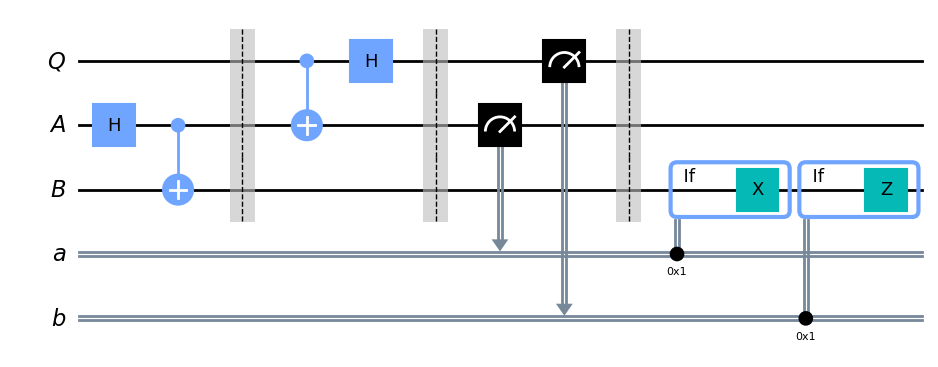

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

protocol.draw()

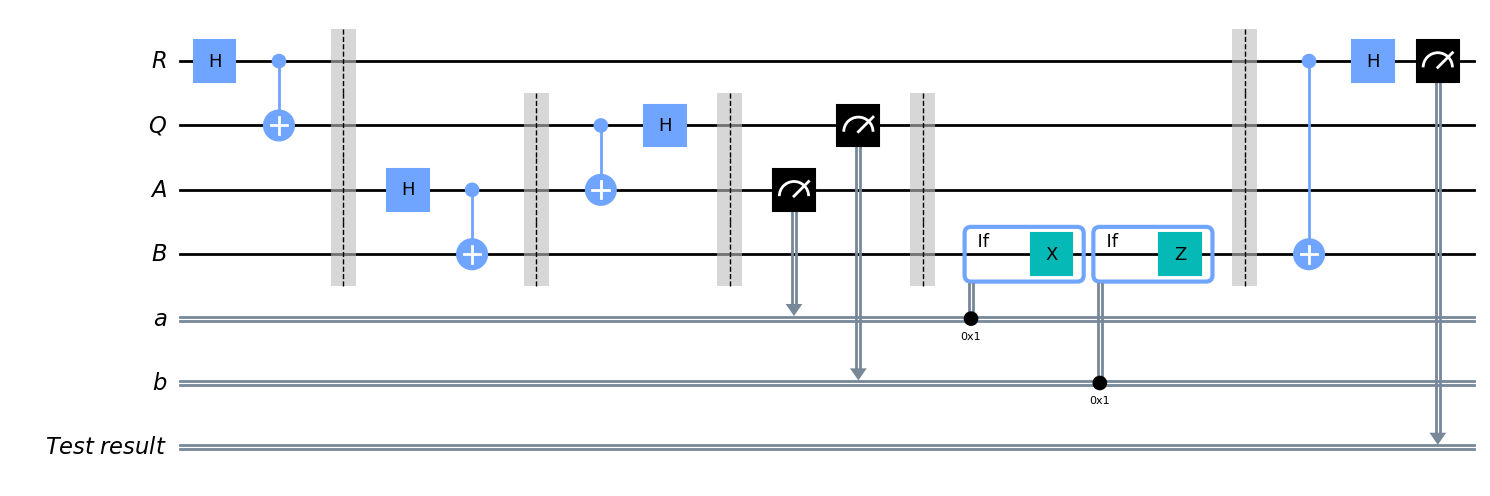

In [2]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol, along with a new "auxiliary" qubit R.
aux = QuantumRegister(1, "R")
test = QuantumCircuit(aux, qubit, ebit0, ebit1, a, b)

# Entangle Q with R
test.h(aux)
test.cx(aux, qubit)
test.barrier()

# Append the protocol the circuit. The 'qubits' argument tells Qiskit that
# the protocol should operate on the qubits numbered 1, 2, and 3 (skipping
# qubit 0, which is R).
test = test.compose(protocol, qubits=[1, 2, 3])
test.barrier()

# After the protocol runs, check that (B,R) is in a phi+ state. We can add
# a new classical bit to the circuit to do this.
test.cx(aux, ebit1)
test.h(aux)
result = ClassicalRegister(1, "Test result")
test.add_register(result)
test.measure(aux, result)

test.draw()

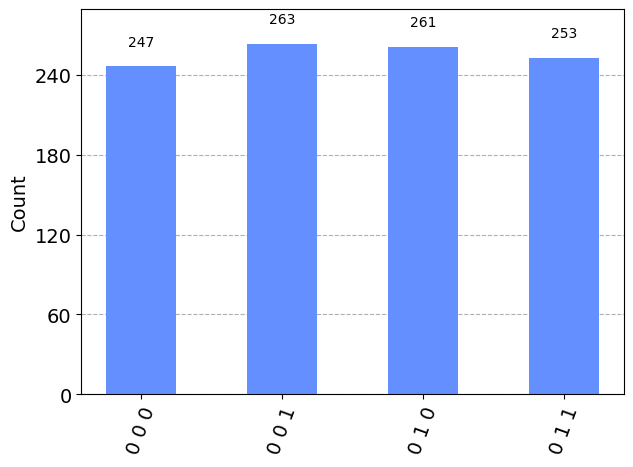

In [3]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

counts = AerSimulator().run(test).result().get_counts()
plot_histogram(counts)

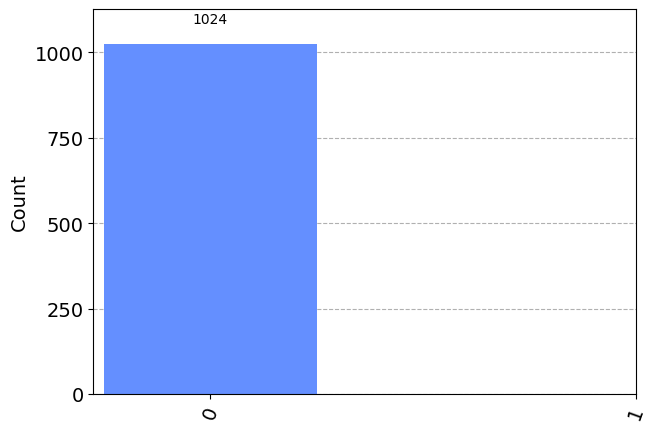

In [4]:
filtered_counts = {"0": 0, "1": 0}

for result, frequency in counts.items():
    filtered_counts[result[0] ] += frequency

plot_histogram(filtered_counts)

## Superdense Coding

## The CHSH game